In [1]:
#Using Linear Regression, to study how the selling price of HDB flat changes based on our multiple factors
#Factors - CBD, School, Park, Market, Hospital, MRT, Facilities, Floor size, storey, age
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression #Algorithm
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv('./data3/HDBResale_Train_Jupyter.csv')
df

,month,new_address,postal_code,town,flat_type,storey_range,storey_from,storey_to,floor_area_sqm,flat_model,lease_commence_date,remaining_lease_in_years,dis_to_cbd,min_dist_to_mrt,min_dist_to_school,min_dist_hospital,min_dist_to_park,min_dist_to_market,min_dist_to_facility,resale_price
0,2019,122 HOUGANG AVENUE 1,530122,HOUGANG,3,01 TO 03,1,3,67.0,New Generation,1983,63.3,8731.682878,721.908407,331.165289,1814.968989,173.496081,438.053245,1328.297563,260000.0
1,2019,122 HOUGANG AVENUE 1,530122,HOUGANG,5,01 TO 03,1,3,133.0,Improved-Maisonette,1983,63.3,8731.682878,721.908407,331.165289,1814.968989,173.496081,438.053245,1328.297563,710000.0
2,2019,951 HOUGANG AVENUE 9,530951,HOUGANG,5,13 TO 15,13,15,121.0,Improved,1999,78.9,10681.260240,1653.971961,418.518565,418.717092,1150.014061,1813.918263,1107.882950,510000.0
3,2019,21 TEBAN GARDENS ROAD,600021,JURONG EAST,4,04 TO 06,4,6,92.0,Model A,2013,93.3,13266.470820,1103.794101,890.396736,1295.660320,1585.189337,520.484512,1750.267136,382000.0
4,2019,20 TEBAN GARDENS ROAD,600020,JURONG EAST,4,01 TO 03,1,3,92.0,Model A,2013,93.3,13337.111780,1117.652338,955.872009,1326.775610,1537.577048,584.991357,1687.852586,380000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51814,2021,116 ANG MO KIO AVENUE 4,560116,ANG MO KIO,2,04 TO 06,4,6,44.0,Improved,1978,56.1,10125.643900,208.580023,246.605467,1031.590181,727.882679,298.726278,869.757017,230000.0
51815,2021,225 ANG MO KIO AVENUE 1,560225,ANG MO KIO,3,10 TO 12,10,12,82.0,New Generation,1978,55.8,9446.144286,482.958376,212.148185,1135.234100,919.691974,137.870595,296.758297,365000.0
51816,2021,219 ANG MO KIO AVENUE 1,560219,ANG MO KIO,3,04 TO 06,4,6,67.0,New Generation,1977,55.3,9251.897123,757.716383,264.770696,1078.680910,940.460113,143.393769,87.344311,305000.0
51817,2021,219 ANG MO KIO AVENUE 1,560219,ANG MO KIO,3,10 TO 12,10,12,67.0,New Generation,1977,55.3,9251.897123,757.716383,264.770696,1078.680910,940.460113,143.393769,87.344311,292000.0


In [3]:
import statistics

def get_median(x):
    split_list = x.split(' TO ')
    float_list = [float(i) for i in split_list]
    median = statistics.median(float_list)
    return median

In [4]:
df['storey_median'] = df ['storey_range'].apply(lambda x:get_median(x))

In [5]:
scope_df = df[['resale_price','dis_to_cbd','min_dist_to_mrt','min_dist_to_school','min_dist_hospital','min_dist_to_park','min_dist_to_market','min_dist_to_facility','storey_median','remaining_lease_in_years','floor_area_sqm']]
scope_df

,resale_price,dis_to_cbd,min_dist_to_mrt,min_dist_to_school,min_dist_hospital,min_dist_to_park,min_dist_to_market,min_dist_to_facility,storey_median,remaining_lease_in_years,floor_area_sqm
0,260000.0,8731.682878,721.908407,331.165289,1814.968989,173.496081,438.053245,1328.297563,2.0,63.3,67.0
1,710000.0,8731.682878,721.908407,331.165289,1814.968989,173.496081,438.053245,1328.297563,2.0,63.3,133.0
2,510000.0,10681.260240,1653.971961,418.518565,418.717092,1150.014061,1813.918263,1107.882950,14.0,78.9,121.0
3,382000.0,13266.470820,1103.794101,890.396736,1295.660320,1585.189337,520.484512,1750.267136,5.0,93.3,92.0
4,380000.0,13337.111780,1117.652338,955.872009,1326.775610,1537.577048,584.991357,1687.852586,2.0,93.3,92.0
...,...,...,...,...,...,...,...,...,...,...,...
51814,230000.0,10125.643900,208.580023,246.605467,1031.590181,727.882679,298.726278,869.757017,5.0,56.1,44.0
51815,365000.0,9446.144286,482.958376,212.148185,1135.234100,919.691974,137.870595,296.758297,11.0,55.8,82.0
51816,305000.0,9251.897123,757.716383,264.770696,1078.680910,940.460113,143.393769,87.344311,5.0,55.3,67.0
51817,292000.0,9251.897123,757.716383,264.770696,1078.680910,940.460113,143.393769,87.344311,11.0,55.3,67.0


In [6]:
scope_df = scope_df.drop_duplicates()
scope_df

,resale_price,dis_to_cbd,min_dist_to_mrt,min_dist_to_school,min_dist_hospital,min_dist_to_park,min_dist_to_market,min_dist_to_facility,storey_median,remaining_lease_in_years,floor_area_sqm
0,260000.0,8731.682878,721.908407,331.165289,1814.968989,173.496081,438.053245,1328.297563,2.0,63.3,67.0
1,710000.0,8731.682878,721.908407,331.165289,1814.968989,173.496081,438.053245,1328.297563,2.0,63.3,133.0
2,510000.0,10681.260240,1653.971961,418.518565,418.717092,1150.014061,1813.918263,1107.882950,14.0,78.9,121.0
3,382000.0,13266.470820,1103.794101,890.396736,1295.660320,1585.189337,520.484512,1750.267136,5.0,93.3,92.0
4,380000.0,13337.111780,1117.652338,955.872009,1326.775610,1537.577048,584.991357,1687.852586,2.0,93.3,92.0
...,...,...,...,...,...,...,...,...,...,...,...
51814,230000.0,10125.643900,208.580023,246.605467,1031.590181,727.882679,298.726278,869.757017,5.0,56.1,44.0
51815,365000.0,9446.144286,482.958376,212.148185,1135.234100,919.691974,137.870595,296.758297,11.0,55.8,82.0
51816,305000.0,9251.897123,757.716383,264.770696,1078.680910,940.460113,143.393769,87.344311,5.0,55.3,67.0
51817,292000.0,9251.897123,757.716383,264.770696,1078.680910,940.460113,143.393769,87.344311,11.0,55.3,67.0


In [7]:
scope_df.dtypes

resale_price                float64
dis_to_cbd                  float64
min_dist_to_mrt             float64
min_dist_to_school          float64
min_dist_hospital           float64
min_dist_to_park            float64
min_dist_to_market          float64
min_dist_to_facility        float64
storey_median               float64
remaining_lease_in_years    float64
floor_area_sqm              float64
dtype: object

<AxesSubplot:>

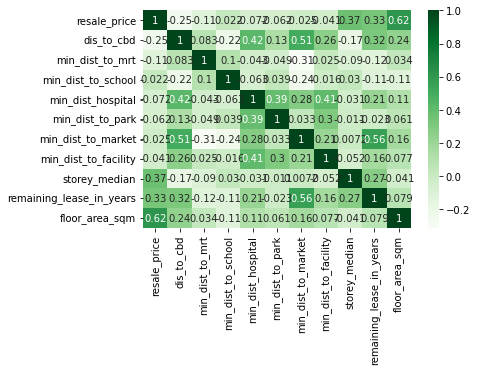

In [8]:
#Correlation Analysis

import seaborn as sns

corrMatrix = scope_df.corr()
sns.heatmap(corrMatrix, 
        xticklabels=corrMatrix.columns,
        yticklabels=corrMatrix.columns,
        cmap='Greens', # https://matplotlib.org/stable/tutorials/colors/colormaps.html
        annot=True)

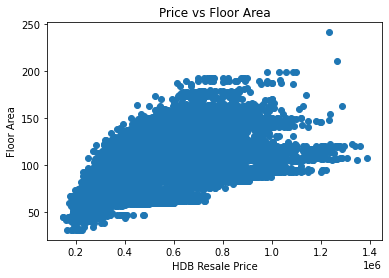

In [9]:
plt.scatter(x = "resale_price" , y ="floor_area_sqm" , data = df)
plt.xlabel("HDB Resale Price")
plt.ylabel("Floor Area")
plt.title("Price vs Floor Area")

plt.show()

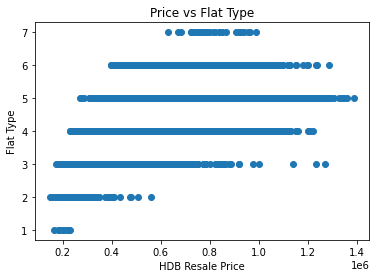

In [10]:
plt.scatter(x = "resale_price" , y ="flat_type" , data = df)
plt.xlabel("HDB Resale Price")
plt.ylabel("Flat Type")
plt.title("Price vs Flat Type")
plt.show()

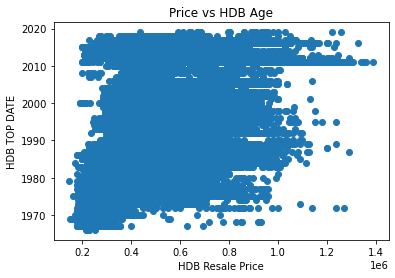

In [11]:
plt.scatter(x = "resale_price" , y ="lease_commence_date" , data = df)
plt.xlabel("HDB Resale Price")
plt.ylabel("HDB TOP DATE")
plt.title("Price vs HDB Age")
plt.show()

In [12]:
df

,month,new_address,postal_code,town,flat_type,storey_range,storey_from,storey_to,floor_area_sqm,flat_model,...,remaining_lease_in_years,dis_to_cbd,min_dist_to_mrt,min_dist_to_school,min_dist_hospital,min_dist_to_park,min_dist_to_market,min_dist_to_facility,resale_price,storey_median
0,2019,122 HOUGANG AVENUE 1,530122,HOUGANG,3,01 TO 03,1,3,67.0,New Generation,...,63.3,8731.682878,721.908407,331.165289,1814.968989,173.496081,438.053245,1328.297563,260000.0,2.0
1,2019,122 HOUGANG AVENUE 1,530122,HOUGANG,5,01 TO 03,1,3,133.0,Improved-Maisonette,...,63.3,8731.682878,721.908407,331.165289,1814.968989,173.496081,438.053245,1328.297563,710000.0,2.0
2,2019,951 HOUGANG AVENUE 9,530951,HOUGANG,5,13 TO 15,13,15,121.0,Improved,...,78.9,10681.260240,1653.971961,418.518565,418.717092,1150.014061,1813.918263,1107.882950,510000.0,14.0
3,2019,21 TEBAN GARDENS ROAD,600021,JURONG EAST,4,04 TO 06,4,6,92.0,Model A,...,93.3,13266.470820,1103.794101,890.396736,1295.660320,1585.189337,520.484512,1750.267136,382000.0,5.0
4,2019,20 TEBAN GARDENS ROAD,600020,JURONG EAST,4,01 TO 03,1,3,92.0,Model A,...,93.3,13337.111780,1117.652338,955.872009,1326.775610,1537.577048,584.991357,1687.852586,380000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51814,2021,116 ANG MO KIO AVENUE 4,560116,ANG MO KIO,2,04 TO 06,4,6,44.0,Improved,...,56.1,10125.643900,208.580023,246.605467,1031.590181,727.882679,298.726278,869.757017,230000.0,5.0
51815,2021,225 ANG MO KIO AVENUE 1,560225,ANG MO KIO,3,10 TO 12,10,12,82.0,New Generation,...,55.8,9446.144286,482.958376,212.148185,1135.234100,919.691974,137.870595,296.758297,365000.0,11.0
51816,2021,219 ANG MO KIO AVENUE 1,560219,ANG MO KIO,3,04 TO 06,4,6,67.0,New Generation,...,55.3,9251.897123,757.716383,264.770696,1078.680910,940.460113,143.393769,87.344311,305000.0,5.0
51817,2021,219 ANG MO KIO AVENUE 1,560219,ANG MO KIO,3,10 TO 12,10,12,67.0,New Generation,...,55.3,9251.897123,757.716383,264.770696,1078.680910,940.460113,143.393769,87.344311,292000.0,11.0


In [13]:
dataset = df. iloc[:, [0,2,4,6,7,8,10,11,12,13,14,15,16,17,18,19]]
dataset

,month,postal_code,flat_type,storey_from,storey_to,floor_area_sqm,lease_commence_date,remaining_lease_in_years,dis_to_cbd,min_dist_to_mrt,min_dist_to_school,min_dist_hospital,min_dist_to_park,min_dist_to_market,min_dist_to_facility,resale_price
0,2019,530122,3,1,3,67.0,1983,63.3,8731.682878,721.908407,331.165289,1814.968989,173.496081,438.053245,1328.297563,260000.0
1,2019,530122,5,1,3,133.0,1983,63.3,8731.682878,721.908407,331.165289,1814.968989,173.496081,438.053245,1328.297563,710000.0
2,2019,530951,5,13,15,121.0,1999,78.9,10681.260240,1653.971961,418.518565,418.717092,1150.014061,1813.918263,1107.882950,510000.0
3,2019,600021,4,4,6,92.0,2013,93.3,13266.470820,1103.794101,890.396736,1295.660320,1585.189337,520.484512,1750.267136,382000.0
4,2019,600020,4,1,3,92.0,2013,93.3,13337.111780,1117.652338,955.872009,1326.775610,1537.577048,584.991357,1687.852586,380000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51814,2021,560116,2,4,6,44.0,1978,56.1,10125.643900,208.580023,246.605467,1031.590181,727.882679,298.726278,869.757017,230000.0
51815,2021,560225,3,10,12,82.0,1978,55.8,9446.144286,482.958376,212.148185,1135.234100,919.691974,137.870595,296.758297,365000.0
51816,2021,560219,3,4,6,67.0,1977,55.3,9251.897123,757.716383,264.770696,1078.680910,940.460113,143.393769,87.344311,305000.0
51817,2021,560219,3,10,12,67.0,1977,55.3,9251.897123,757.716383,264.770696,1078.680910,940.460113,143.393769,87.344311,292000.0


In [14]:
X = dataset.iloc[:, :7]
y = dataset.iloc[:, -1]

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

#253 Ang Mo Kio St 21, $750k in Sept 2021
print(regressor.predict([[2022,560253,5,10,12,138,1996]]))

[718389.54264478]


In [15]:
#105 Ang Mo Kio Ave 4, $440k in Jun 2021
print(regressor.predict([[2022,560105,4,4,6,92,1978]]))

[413120.83800921]


In [16]:
#310B Ang Mo Kio Ave 1, $760k in Mar 2022
print(regressor.predict([[2022,562310,4,16,18,94,2012]]))

[631431.08309187]


In [17]:
#Jupyter - Long Set
X = dataset.iloc[:, :15]
y = dataset.iloc[:, -1]

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

#253 ANG MO KIO STREET 21, $750000 in 2021
print(regressor.predict([[2021,560253,5,4,6,138,1996,73.6,9738.088201,306.8549548,151.5172511,1339.020652,1059.242712,588.4520312,739.6176054]]))

[750499.83103865]


In [18]:
#105 ANG MO KIO AVENUE 4, $440000 in 2021
print(regressor.predict([[2021,560105,4,7,9,92,1978,55.9,9992.785762,148.5268718,390.5880377,925.940993,629.4587746,266.2190476,705.9238977]]))

[470090.09336273]


In [19]:
#310B ANG MO KIO AVENUE 1, $760000 in 2022
print(regressor.predict([[2022,562310,4,16,18,94,2012,89.6,9062.142755,831.0047476,351.6049876,1081.823536,548.125356,433.9751462,455.3371208]]))

[709299.53734428]


In [20]:
#832 HOUGANG CENTRAL, $612888 in 2019
print(regressor.predict([[2019,530832,5,13,15,125,1992,72.5,10595.10125,296.3628235,365.4755921,119.7761583,1216.380602,1341.765648,192.3416772]]))

[625407.76204197]


In [21]:
#774 BEDOK RESERVOIR VIEW, $568000 in 2019
print(regressor.predict([[2019,470774,5,4,6,115,2000,80.9,11200.4189,497.7695863,332.4143661,1209.179148,1616.084613,547.918404,1128.021516]]))

[579867.29017517]


In [22]:
#539 JURONG WEST AVENUE 1, $428000 in 2020
print(regressor.predict([[2020,640539,5,7,9,134,1984,63.8,16789.23013,892.677829,534.8853544,1603.716321,1694.90375,270.0383667,671.0335129]]))

[531700.04649371]


In [23]:
#419 SERANGOON CENTRAL, $610000 in 2020
print(regressor.predict([[2020,550419,4,10,12,103,1989,68.3,7813.899036,378.3741709,283.1675253,2487.68893,1089.931403,1576.83836,546.3062114]]))

[541169.17085886]


In [24]:
#165 BEDOK SOUTH ROAD, $358000 in 2020
print(regressor.predict([[2020,460165,4,4,6,83,1985,63.8,11327.23493,537.7498014,290.0161154,1717.524202,2623.110337,692.1016191,1024.878326]]))

[363843.15769185]


In [25]:
#109 LORONG 1 TOA PAYOH, $233000 in 2020
print(regressor.predict([[2020,310109,3,1,3,66,1970,48.8,6464.518355,107.8183669,381.5305038,1034.844899,1196.795595,388.8601699,668.1476092]]))

[292971.92389162]


In [26]:
#668B EDGEFIELD PLAINS, $650668 in 2021
print(regressor.predict([[2021,822668,5,1,3,113,2016,94.5,15114.66737,277.4329455,233.6578935,2468.886442,1139.104446,5873.005269,1429.673242]]))

[532730.49406244]


In [27]:
#30 BENDEMEER ROAD, $380000 in 2019
print(regressor.predict([[2019,330030,3,10,12,78,1972,51.6,4230.401582,226.4121601,361.9213853,605.4468389,1401.009629,99.30909452,720.7592898]]))

[391602.83939824]


In [28]:
#5 JALAN BATU, $310000 in 2019
print(regressor.predict([[2019,431005,3,7,9,60,1969,48.8,4180.97057,477.0538746,299.2536601,2013.127627,1856.505761,87.5908795,236.2514646]]))

[260784.59184267]


In [29]:
#544 SERANGOON NORTH AVENUE 3, $724000 in 2021
print(regressor.predict([[2021,550544,5,4,6,145,1997,75.7,10341.02508,2022.981141,450.0748914,835.9606466,1185.349008,1226.440395,1761.196641]]))

[682733.42483775]


In [30]:
#468A ADMIRALTY DRIVE, $460000 in 2019
print(regressor.predict([[2019,751468,5,10,12,137,2001,81.2,18988.81628,721.3250946,223.462675,3599.77745,2772.372419,2660.88824,3728.82547]]))

[523259.12475561]


In [31]:
#636B SENJA ROAD, $475000 in 2020
print(regressor.predict([[2020,672636,4,22,24,92,2015,94.8,15520.53854,697.187765,208.9619241,1023.770566,1219.191999,5383.565501,970.4155151]]))

[483164.35067911]


In [32]:
##645 PUNGGOL CENTRAL, $450000 in 2019
print(regressor.predict([[2019,820645,5,16,18,110,2005,85,14606.92052,194.4598611,306.8559642,2506.535418,1411.379436,5440.485236,596.4062907]]))

[491065.81805997]


In [33]:
#611 WOODLANDS RING ROAD, $370000 in 2019
print(regressor.predict([[2019,730611,5,1,3,122,1998,78.2,17905.11429,723.3167857,118.5525269,2473.863073,2525.234932,2390.253815,1858.51821]]))

[423586.7932459]


In [34]:
#272 BISHAN STREET 24, $625000 in 2019
print(regressor.predict([[2019,570272,4,7,9,104,1992,72.6,8159.301663,892.9987315,93.05616073,1752.621479,761.1358279,800.0386909,843.3716116]]))

[502520.9060881]


In [35]:
#272 BISHAN STREET 24, $625000 in 2019
print(regressor.predict([[2019,533980,4,10,12,85,2003,83.3,11225.92208,1164.151343,221.3234219,485.9393181,1681.516095,2371.53708,1291.039554]]))

[403291.51336078]


In [36]:
#51 STRATHMORE AVENUE, $705000 in 2019
print(regressor.predict([[2019,140051,4,19,21,90,2006,86.8,4866.622,330.4450955,307.4890279,1034.370961,1616.50662,656.2974333,796.0106017]]))

[666971.79593505]


In [37]:
X = dataset.drop(['resale_price'], axis = 1)

In [38]:
X

,month,postal_code,flat_type,storey_from,storey_to,floor_area_sqm,lease_commence_date,remaining_lease_in_years,dis_to_cbd,min_dist_to_mrt,min_dist_to_school,min_dist_hospital,min_dist_to_park,min_dist_to_market,min_dist_to_facility
0,2019,530122,3,1,3,67.0,1983,63.3,8731.682878,721.908407,331.165289,1814.968989,173.496081,438.053245,1328.297563
1,2019,530122,5,1,3,133.0,1983,63.3,8731.682878,721.908407,331.165289,1814.968989,173.496081,438.053245,1328.297563
2,2019,530951,5,13,15,121.0,1999,78.9,10681.260240,1653.971961,418.518565,418.717092,1150.014061,1813.918263,1107.882950
3,2019,600021,4,4,6,92.0,2013,93.3,13266.470820,1103.794101,890.396736,1295.660320,1585.189337,520.484512,1750.267136
4,2019,600020,4,1,3,92.0,2013,93.3,13337.111780,1117.652338,955.872009,1326.775610,1537.577048,584.991357,1687.852586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51814,2021,560116,2,4,6,44.0,1978,56.1,10125.643900,208.580023,246.605467,1031.590181,727.882679,298.726278,869.757017
51815,2021,560225,3,10,12,82.0,1978,55.8,9446.144286,482.958376,212.148185,1135.234100,919.691974,137.870595,296.758297
51816,2021,560219,3,4,6,67.0,1977,55.3,9251.897123,757.716383,264.770696,1078.680910,940.460113,143.393769,87.344311
51817,2021,560219,3,10,12,67.0,1977,55.3,9251.897123,757.716383,264.770696,1078.680910,940.460113,143.393769,87.344311


In [39]:
Y = dataset['resale_price']

In [40]:
Y

0        260000.0
1        710000.0
2        510000.0
3        382000.0
4        380000.0
           ...   
51814    230000.0
51815    365000.0
51816    305000.0
51817    292000.0
51818    320000.0
Name: resale_price, Length: 51819, dtype: float64

In [41]:
X.shape

(51819, 15)

In [42]:
Y.shape

(51819,)

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
X_scaled

array([[0.        , 0.61935446, 0.33333333, ..., 0.02726842, 0.06961268,
        0.30280808],
       [0.        , 0.61935446, 0.66666667, ..., 0.02726842, 0.06961268,
        0.30280808],
       [0.        , 0.62042387, 0.66666667, ..., 0.34461695, 0.29462381,
        0.25081614],
       ...,
       [0.66666667, 0.65817973, 0.33333333, ..., 0.27651617, 0.0214236 ,
        0.01008896],
       [0.66666667, 0.65817973, 0.33333333, ..., 0.27651617, 0.0214236 ,
        0.01008896],
       [0.66666667, 0.65832292, 0.33333333, ..., 0.10012631, 0.05765642,
        0.0247388 ]])

In [45]:
scaler.data_max_

array([2.02200000e+03, 8.25195000e+05, 7.00000000e+00, 4.90000000e+01,
       5.10000000e+01, 2.41000000e+02, 2.01900000e+03, 9.78000000e+01,
       2.02251040e+04, 3.49640281e+03, 3.30250938e+03, 5.16411062e+03,
       3.16670325e+03, 6.12704905e+03, 4.28397253e+03])

In [46]:
scaler.data_min_

array([2.01900000e+03, 5.00040000e+04, 1.00000000e+00, 1.00000000e+00,
       3.00000000e+00, 3.10000000e+01, 1.96600000e+03, 4.38000000e+01,
       5.92122414e+02, 2.26058811e+01, 3.87326699e+01, 3.85527644e+01,
       8.95880029e+01, 1.23958663e+01, 4.45731670e+01])

In [47]:
print(X_scaled[:,0])

[0.         0.         0.         ... 0.66666667 0.66666667 0.66666667]


In [48]:
y = y.values.reshape(-1,1)

In [49]:
y.shape

(51819, 1)

In [50]:
y_scaled = scaler.fit_transform(y)

In [51]:
y_scaled

array([[0.0912341 ],
       [0.45348823],
       [0.2924864 ],
       ...,
       [0.12745952],
       [0.1169944 ],
       [0.13953465]])

In [52]:
X_train, X_test , y_train , y_test = train_test_split(X , y , test_size = 0.1)

In [53]:
X_train.shape

(46637, 15)

In [54]:
X_test.shape

(5182, 15)

In [55]:
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [56]:
y_pred = model.predict(X_test)
y_pred

array([[497154.25512746],
       [339425.17947876],
       [526323.09178038],
       ...,
       [508268.87513962],
       [604055.03317967],
       [470949.11748883]])

In [57]:
y_test

array([[470000.],
       [364000.],
       [420000.],
       ...,
       [525000.],
       [550000.],
       [425000.]])

In [58]:
int_array = y_pred. astype(float)
y_pred

array([[497154.25512746],
       [339425.17947876],
       [526323.09178038],
       ...,
       [508268.87513962],
       [604055.03317967],
       [470949.11748883]])

In [59]:
int_array = y_test. astype(float)
y_test

array([[470000.],
       [364000.],
       [420000.],
       ...,
       [525000.],
       [550000.],
       [425000.]])

In [60]:
metrics.r2_score(y_test , y_pred)

0.8434627344258305